
# Generate a Probe from scratch

This example generates a probe from scratch.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GeoProbe import Probe
from GeoProbe.plotting import plot_probe

First, let's create dummy positions for a 24-contact probe



In [2]:
n = 8
positions = np.zeros((n, 2))

L_x = [35,27,43,21,52,18,60,17]
L_y = [20, 100, 180, 260, 340, 400, 480, 560]

assert len(L_x) == n, "number of coordinate doesn't match"
for i, j in enumerate(L_x):
    x = j
    y = 20 + 80*i
    positions[i] = x, y

Now we can create a `Probe` object
 and set the position and shape of each contact
 
The `ndim` argument indicates that the contact is 2d, so the positions have a (n_elec, 2) shape.
 We can also define a 3d probe with `ndim=3` and positions will have a (n_elec, 3) shape.
 
Note: `shapes` and `shape_params` could be arrays as well, indicating the shape for each contact separately.



In [3]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='square', shape_params={'width': 13})

`Probe` objects have fancy prints!



In [4]:
print(probe)

Probe - 8ch - 1shanks


In addition to contacts, we can create the planar contour (polygon) of the probe



In [5]:
polygon = [(0, 700), (0, 566), (10, 180), (23, 20), (35, 0),(47, 20), (60, 180), (83, 566), (83, 700)]
probe.set_planar_contour(polygon)

If `pandas` is installed, the `Probe` object can be exported as a dataframe for a simpler view:



In [6]:
df = probe.to_dataframe()
df

,x,y,contact_shapes,width,shank_ids,contact_ids
0,35.0,20.0,square,13.0,,
1,27.0,100.0,square,13.0,,
2,43.0,180.0,square,13.0,,
3,21.0,260.0,square,13.0,,
4,52.0,340.0,square,13.0,,
5,18.0,420.0,square,13.0,,
6,60.0,500.0,square,13.0,,
7,17.0,580.0,square,13.0,,


If `matplotlib` is installed, the `Probe` can also be easily plotted:



(<matplotlib.collections.PolyCollection at 0x1d3d3f0d820>,
 <matplotlib.collections.PolyCollection at 0x1d3d4034a70>)

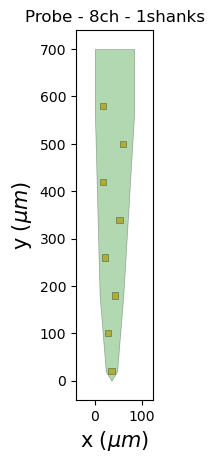

In [25]:
plot_probe(probe,  with_contact_id = True)

A 2d `Probe` can be transformed into a 3d `Probe` by indicating the `axes`
on which contacts will lie (Here the 'y' coordinate will be 0 for all contacts):



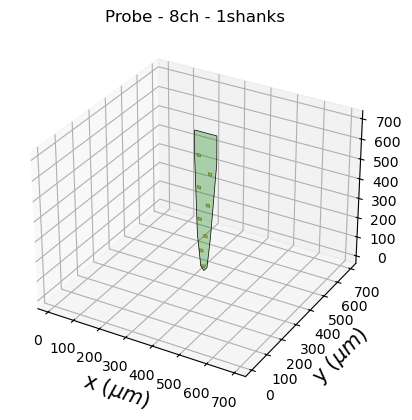

In [24]:
probe_3d = probe.to_3d(axes='xz')
probe_3d.move([300, 400, 0])

plot_probe(probe_3d)

plt.show()